In [27]:
import pandas as pd
from shapely.geometry import Point
import matplotlib.pyplot as plt
import geopandas as gpd

In [118]:
import pyproj
     # Define the input and output coordinate reference systems
in_crs = 'EPSG:4326'
out_crs = 'EPSG:2154 '  # Lambert Conformal Conic projection for France
transformer = pyproj.Transformer.from_crs(in_crs, out_crs)


def to_2Dcoords(coords):
   
    x, y = float(coords.split(',')[0]), float(coords.split(',')[-1])
    # Create a PyProj transformer object

    # Transform the input coordinates to the output CRS
    x, y = transformer.transform(x, y)  # Example input coordinates (longitude, latitude)

    return x, y

In [131]:
data_path = './data/'
existent_stations = pd.read_csv(data_path + 'Données de stations TE_DV.csv')
existent_stations['Coordinates_X'] = existent_stations.Coordinates.map(lambda x: to_2Dcoords(x)[0])
existent_stations['Coordinates_Y'] = existent_stations.Coordinates.map(lambda x: to_2Dcoords(x)[1])
existent_stations = existent_stations[(existent_stations.Coordinates_X > 0 ) & (existent_stations.Coordinates_X < 1e7)]


In [126]:
existent_stations

,URL,Station de service,Ville,Adresse,Coordinates,Energies,Lavage,Paiement,Produits & Services,Services,Club TotalEnergies,Truck,H2 Conversion,Coordinates_X,Coordinates_Y
0,https://store.totalenergies.fr/fr_FR/NF059116,RELAIS SERIGUETTE,AIMARGUES,"2 bis. ROUTE DE LA PETITE CAMARGUE , 30470 AI...","43.6961378,4.2007447","AdBlue Truck, Excellium 98, Excellium Diesel, ...",NaN,"Routex, UTA, DKV, Mobility de TotalEnergies, M...","AdBlue Truck,","Café, Justbip, Wifi, AdBlue bidon,","Assistance Club 10 Jours, Jauge Cadeau, Cagnot...","Truck, Truck store,",0.0,7.968169e+05,6.289303e+06
1,https://store.totalenergies.fr/fr_FR/NF080036,RELAIS DEVEZE,BEZIERS,"1 AVENUE DE LA DEVEZE , 34500 BEZIERS, FRANCE","43.33150089999999,3.2474023","AdBlue Truck, Super Ethanol e85, Excellium 98,...","Lavage Haute Pression, Aspirateur, Lavage à Ro...","UTA, Carte Jubileo, MOL, Carte Wash, American ...","AdBlue Truck,","FDJ, Café, Lavage à Rouleaux, Justbip, Gonflag...","Assistance Club 10 Jours, Jauge Cadeau, Cagnot...","Truck, Truck store,",0.0,7.200759e+05,6.248070e+06
2,https://store.totalenergies.fr/fr_FR/NF080198,RELAIS SAINT MATHURIN,ALLONNE,"ZAC SAINT MATHURIN - RD 1001 , 60000 ALLONNE,...","49.409445,2.12815","Borne DC175 kW, AdBlue Truck, Excellium 98, Ex...","Aspirateur, Lavage à Rouleaux,","Visa, American Express, Mastercard, Eurotrafic...","AdBlue Truck,","Café, Lavage à Rouleaux, Gonflage, Wifi, Justb...","Assistance Club 10 Jours, Jauge Cadeau, Cagnot...","Truck, Pompes PL,",1.0,6.367093e+05,6.923680e+06
3,https://store.totalenergies.fr/fr_FR/NF080197,REL.LORRAINE LES RAPPES,SANDAUCOURT,"AUT.A31-LORRAINE LES RAPPES , 88170 SANDAUCOU...","48.2659392,5.863884","Borne AC43/DC50 kW, Borne DC175 kW, SP95 e10, ...",NaN,"Mobility de TotalEnergies, Carte Jubileo, Cart...","AdBlue Truck,","Défibrillateur, Café, Wifi, Autoroutière, Toil...","Assistance Club 30 Jours, Club Truck, Cagnotte...","Truck, Pompes PL,",0.0,9.124688e+05,6.800031e+06
4,https://store.totalenergies.fr/fr_FR/NF058916,REL.MORAINVILLIERS NORD,MORAINVILLIERS,"A13 - AIRE DE MORAINVILLIERS NORD , 78630 MOR...","48.9411429,1.9543387","Diesel, GPL, SP95 e10, Excellium 98, GNR, Exce...",NaN,"Mobility de TotalEnergies, MOL, American Expre...","AdBlue Truck,","Click & Collect Lyf, Toilettes, Défibrillateur...","Assistance Club 30 Jours, Club Truck, Cagnotte...","Truck, Parking PL, Truck store,",0.0,6.234026e+05,6.871749e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3725,https://store.totalenergies.fr/fr_FR/NF080373,REL. REIMS CHAMPAGNE NORD,LES PETITES LOGES,"A4 - STRASBOURG PARIS , 51400 LES PETITES LOG...","49.1276576,4.2306532","AdBlue Truck, Excellium 98, Excellium Diesel, ...",NaN,"American Express, Mastercard, Eurotrafic, Visa...","AdBlue Truck,","Autoroutière,",NaN,NaN,NaN,7.898242e+05,6.892684e+06
3726,https://store.totalenergies.fr/fr_FR/NF059484,RELAIS DE COMBAULT,PONTAULT COMBAULT,"6 A 10 AVENUE CHARLES ROUXEL , 77340 PONTAULT...","48.7979516,2.6047319","Excellium 98, Excellium Diesel, Diesel, SP95 e...","Lavage Haute Pression, Aspirateur, Lavage à Ro...","Carte Wash, MOL, Mobility de TotalEnergies, Am...",NaN,"Café, Lavage à Rouleaux, Justbip, Gonflage,","Assistance Club 10 Jours, Jauge Cadeau, Cagnot...",NaN,NaN,6.709652e+05,6.855392e+06
3727,https://store.totalenergies.fr/fr_FR/NF059254,RELAIS DE LA PIMPE,TOULOUSE,"55 BOULEVARD DE SUISSE , 31200 TOULOUSE, FRANCE","43.6157844,1.4211393","SP95 e10, Excellium 98, Excellium Diesel, Dies...","Aspirateur, Lavage Haute Pression, Lavage à Ro...","Eurotrafic, MOL, American Express, Mastercard,...",NaN,"Lavage à Rouleaux, Justbip, Gonflage, Café,","Assistance Club 10 Jours, Jauge Cadeau, Cagnot...",NaN,NaN,5.725204e+05,6.280912e+06
3728,https://store.totalenergies.fr/fr_FR/NF903685,STATION ELAN MONTAUBAN,MONTAUBAN,"395 avenue de Bordeaux , 82000 MONTAUBAN, FRANCE","44.0252837,1.3316933",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.662608e+05,6.326555e+06


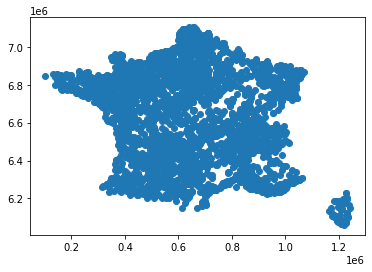

In [132]:
plt.scatter(existent_stations.Coordinates_X, existent_stations.Coordinates_Y)